In [ ]:
import pandas as pd
import io

from google.colab import files
data_to_load = files.upload()
    
df_master = pd.read_csv(io.BytesIO(data_to_load['dqlab_telco_encoded.csv']), error_bad_lines=False)

Saving dqlab_telco_encoded.csv to dqlab_telco_encoded.csv


In [ ]:
df = df_master.copy()
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gendercode,Partnercode,Dependentscode,PhoneServicecode,MultipleLinescode,InternetServicecode,OnlineSecuritycode,OnlineBackupcode,DeviceProtectioncode,TechSupportcode,StreamingTVcode,StreamingMoviescode,Contractcode,PaperlessBillingcode,PaymentMethodcode,Churncode
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
#Determining numerical variable 
num = df[["tenure","MonthlyCharges","TotalCharges","Churncode"]]
num.head()

,tenure,MonthlyCharges,TotalCharges,Churncode
0,1.0,29.85,29.85,0
1,34.0,56.95,1889.50,0
2,2.0,53.85,108.15,1
3,45.0,42.30,1840.75,0
4,2.0,70.70,151.65,1


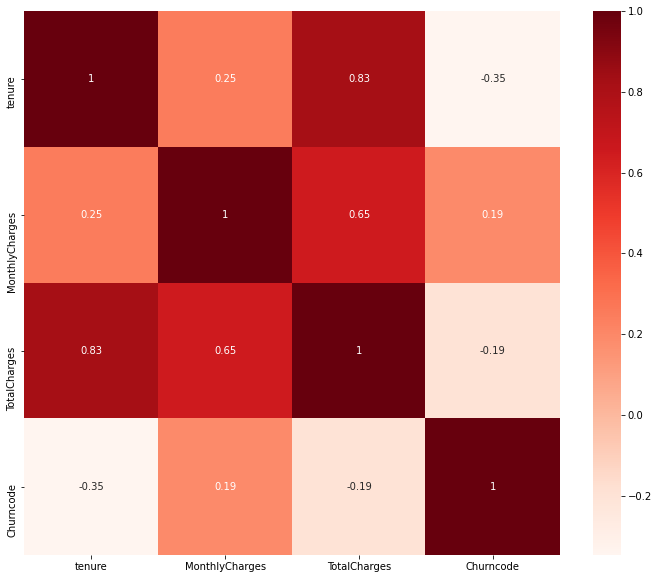

In [ ]:
#Creating heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Churncode"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

tenure            0.346770
MonthlyCharges    0.191986
TotalCharges      0.194359
Churncode         1.000000
Name: Churncode, dtype: float64

In [ ]:
#Ensuring that there is no correlation between variables
print(df[["tenure","MonthlyCharges"]].corr())
print(df[["tenure","TotalCharges"]].corr())
print(df[["MonthlyCharges","TotalCharges"]].corr())

                  tenure  MonthlyCharges
tenure          1.000000        0.248513
MonthlyCharges  0.248513        1.000000
                tenure  TotalCharges
tenure        1.000000      0.825359
TotalCharges  0.825359      1.000000
                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.649277
TotalCharges          0.649277      1.000000


In [ ]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gendercode,Partnercode,Dependentscode,PhoneServicecode,MultipleLinescode,InternetServicecode,OnlineSecuritycode,OnlineBackupcode,DeviceProtectioncode,TechSupportcode,StreamingTVcode,StreamingMoviescode,Contractcode,PaperlessBillingcode,PaymentMethodcode,Churncode
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
#Determining categorical variable 
cat = df[["UpdatedAt","customerID","gendercode","SeniorCitizen","Partnercode","Dependentscode","PhoneServicecode","MultipleLinescode","InternetServicecode","OnlineSecuritycode","OnlineBackupcode","DeviceProtectioncode","TechSupportcode","StreamingTVcode","StreamingMoviescode","Contractcode","PaperlessBillingcode","PaymentMethodcode","Churncode"]]
cat.head()

,UpdatedAt,customerID,gendercode,SeniorCitizen,Partnercode,Dependentscode,PhoneServicecode,MultipleLinescode,InternetServicecode,OnlineSecuritycode,OnlineBackupcode,DeviceProtectioncode,TechSupportcode,StreamingTVcode,StreamingMoviescode,Contractcode,PaperlessBillingcode,PaymentMethodcode,Churncode
0,202006,45759018157,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,202006,45557574145,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,202006,45366876421,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,202006,45779536532,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,202006,45923787906,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
#Writing the code of Kendall's for categorical variables
import numpy as np
kendalls = cat.corr(method='kendall')
relevant_features = kendalls[kendalls>0.1]
relevant_features

,UpdatedAt,customerID,gendercode,SeniorCitizen,Partnercode,Dependentscode,PhoneServicecode,MultipleLinescode,InternetServicecode,OnlineSecuritycode,OnlineBackupcode,DeviceProtectioncode,TechSupportcode,StreamingTVcode,StreamingMoviescode,Contractcode,PaperlessBillingcode,PaymentMethodcode,Churncode
UpdatedAt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customerID,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gendercode,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.141803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157951,NaN,0.146403
Partnercode,NaN,NaN,NaN,NaN,1.000000,0.452218,NaN,0.136909,NaN,0.142182,0.145163,0.157996,0.118321,0.132093,0.121914,0.280674,NaN,NaN,NaN
Dependentscode,NaN,NaN,NaN,NaN,0.452218,1.000000,NaN,NaN,NaN,0.153233,NaN,NaN,0.132902,NaN,NaN,0.231779,NaN,NaN,NaN
PhoneServicecode,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.378258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLinescode,NaN,NaN,NaN,0.141803,0.136909,NaN,NaN,1.000000,NaN,NaN,NaN,0.101492,NaN,0.153207,0.159002,NaN,0.160624,NaN,NaN
InternetServicecode,NaN,NaN,NaN,NaN,NaN,NaN,0.378258,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecuritycode,NaN,NaN,NaN,NaN,0.142182,0.153233,NaN,NaN,NaN,1.000000,0.195087,0.184228,0.299822,NaN,NaN,0.356099,NaN,NaN,NaN


In [ ]:
#Ensuring that there is no correlation between variables
print(df[["SeniorCitizen","PaperlessBillingcode"]].corr())

                      SeniorCitizen  PaperlessBillingcode
SeniorCitizen              1.000000              0.157951
PaperlessBillingcode       0.157951              1.000000
